In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

#Assign each file a variable name
file1 = 'takehome_user_engagement.csv'
file2 = 'takehome_users.csv'

#Import each file
user_engagement_df = pd.read_csv(file1)
users_df = pd.read_csv(file2, encoding= "ISO-8859-1")

print(user_engagement_df.head())
print(users_df.head())


            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1
   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com   

In [2]:
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None


In [3]:
#Fill the NAs for Invited by User_ID
users_df['invited_by_user_id'] = users_df['invited_by_user_id'].fillna(0)

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
#Update the datetime columns
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'], format='%Y-%m-%d %H:%M:%S')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'], unit='s')

In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [7]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [8]:
users_df['last_session_creation_time'] = users_df['last_session_creation_time'].fillna(0)

In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [10]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
print(user_engagement_df.visited.value_counts())
#user_engagement_df.drop(['visited'], axis=1, inplace=True)
user_engagement_df['time_stamp'] = pd.to_datetime(user_engagement_df['time_stamp'], format='%Y-%m-%d %H:%M:%S')
print(user_engagement_df.info())

1    207917
Name: visited, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB
None


In [12]:
user_engagement_df['time_stamp'] = pd.to_datetime(user_engagement_df['time_stamp'])
user_engagement_grouped = user_engagement_df.groupby(['user_id', pd.Grouper(key='time_stamp', freq = '7D')]).sum()
print(user_engagement_grouped)

                             visited
user_id time_stamp                  
1       2014-04-17 08:20:06        1
2       2013-11-14 08:20:06        1
        2013-11-28 08:20:06        1
        2013-12-05 08:20:06        1
        2013-12-19 08:20:06        1
        2013-12-26 08:20:06        1
        2014-01-02 08:20:06        1
        2014-01-30 08:20:06        1
        2014-02-06 08:20:06        3
        2014-02-13 08:20:06        1
        2014-03-06 08:20:06        2
        2014-03-27 08:20:06        1
3       2013-03-14 08:20:06        1
4       2013-05-16 08:20:06        1
5       2013-01-17 08:20:06        1
6       2013-12-12 08:20:06        1
7       2012-12-20 08:20:06        1
10      2013-01-10 08:20:06        1
        2013-01-17 08:20:06        1
        2013-01-24 08:20:06        1
        2013-01-31 08:20:06        2
        2013-02-14 08:20:06        3
        2013-02-21 08:20:06        1
        2013-02-28 08:20:06        3
        2013-03-07 08:20:06        1
 

In [13]:
#Identifying users with more than 3 logins in a 7 day window
user_engagement_grouped = user_engagement_grouped.loc[user_engagement_grouped['visited']>=3, :].reset_index()
user_engagement_grouped['adopted'] = 1
user_engagement_grouped = user_engagement_grouped.drop(['time_stamp', 'visited'], axis=1).drop_duplicates().reset_index()
print(user_engagement_grouped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 3 columns):
index      1439 non-null int64
user_id    1439 non-null int64
adopted    1439 non-null int64
dtypes: int64(3)
memory usage: 33.8 KB
None


In [14]:
user_engagement_grouped = user_engagement_grouped.drop(['index'], axis=1)
print(user_engagement_grouped)

      user_id  adopted
0           2        1
1          10        1
2          42        1
3          43        1
4          53        1
5          63        1
6          69        1
7          74        1
8          81        1
9          82        1
10         87        1
11        133        1
12        135        1
13        141        1
14        146        1
15        153        1
16        160        1
17        165        1
18        168        1
19        174        1
20        185        1
21        188        1
22        197        1
23        200        1
24        202        1
25        203        1
26        209        1
27        214        1
28        230        1
29        245        1
...       ...      ...
1409    11764        1
1410    11769        1
1411    11782        1
1412    11796        1
1413    11801        1
1414    11805        1
1415    11806        1
1416    11823        1
1417    11836        1
1418    11841        1
1419    11857        1
1420    118

In [15]:
UsersEngagementJoined = users_df.merge(user_engagement_grouped, how='left', left_on = 'object_id', right_on = 'user_id')

print(UsersEngagementJoined.head())

   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2          

In [16]:
UsersEngagementJoined = UsersEngagementJoined.drop(['user_id'], axis=1)
UsersEngagementJoined = UsersEngagementJoined.fillna(0)
print(UsersEngagementJoined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted                       12000 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 1.1+ MB
None


In [17]:
#Count the number of customers considered retained (took more than 1 trip within 30 days of signup)
adopted_status = UsersEngagementJoined['adopted'].value_counts()
notadopt = float(adopted_status[0])
adopted = float(adopted_status[1])
total_subs = float(len(UsersEngagementJoined))
per_not_adopt = float(notadopt/total_subs)
per_adopted = float(adopted/total_subs)

print('Number of Subscribers Not Adopted:',"{0:,.0f}".format(notadopt))
print('Number of Subscribers Adopted:', "{0:,.0f}".format(adopted))
print('Percentage of Subscribers Not Adopted:', "{:.2%}".format(per_not_adopt))
print('Percentage of Subscribers Adopted:', "{:.2%}".format(per_adopted))

Number of Subscribers Not Adopted: 10,561
Number of Subscribers Adopted: 1,439
Percentage of Subscribers Not Adopted: 88.01%
Percentage of Subscribers Adopted: 11.99%


In [18]:
#Determine which features are most important for predicting if a user will become an adopted user
print(UsersEngagementJoined.head())

   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2          

In [19]:
UsersEngagementJoined.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [20]:
cleanup_nums = {"creation_source": {"ORG_INVITE": 0, "GUEST_INVITE": 1, "PERSONAL_PROJECTS": 2, "SIGNUP": 3, "SIGNUP_GOOGLE_AUTH": 4}}

UsersEngagementJoined.replace(cleanup_nums, inplace=True)

UsersEngagementJoined.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,0,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,0,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [21]:
#Create a numerical column to account for the time between last login and creation date
from datetime import date
import dateutil

UsersEngagementJoined['daysbtwn'] = UsersEngagementJoined['last_session_creation_time'] - UsersEngagementJoined['creation_time']

#Convert the days between column to a float
UsersEngagementJoined['daysbtwn'] = UsersEngagementJoined['daysbtwn'].dt.days
print(UsersEngagementJoined.head())

   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email  creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com                1        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com                0        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com                0        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com                1        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com                1        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2    

In [22]:
#The actual user id for invited by probably isn't likely to be a strong predictor, but whether or not they were invited by a user might be
#UsersEngagementJoined.invited_by_user_id.value_counts()
UsersEngagementJoined['invitedbyuser'] = [1 if ele > 0 else 0 for ele in UsersEngagementJoined['invited_by_user_id']]
UsersEngagementJoined.invitedbyuser.value_counts()


1    6417
0    5583
Name: invitedbyuser, dtype: int64

In [23]:
#Drop unnecessary columns (object_id, email, name, date columns)
UsersEngagementJoined = UsersEngagementJoined.drop(['object_id','email', 'name', 'creation_time', 'invited_by_user_id','last_session_creation_time'], axis=1)

UsersEngagementJoined.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,daysbtwn,invitedbyuser
0,1,1,0,11,0.0,0,1
1,0,0,0,1,1.0,136,1
2,0,0,0,94,0.0,0,1
3,1,0,0,1,0.0,1,1
4,1,0,0,193,0.0,5,1


In [25]:
#Predictive Model and feature selection

y = UsersEngagementJoined['adopted'].values
X = UsersEngagementJoined.drop('adopted', axis = 1).values

print(X)

[[  1   1   0  11   0   1]
 [  0   0   0   1 136   1]
 [  0   0   0  94   0   1]
 ..., 
 [  1   1   1  83   0   1]
 [  2   0   0   6   2   0]
 [  3   0   1   0   0   0]]


In [26]:
#Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

print ('Train shape: '+ str(X_train.shape)+str(y_train.shape))
print ('Test shape: ' +str(X_test.shape)+str( y_test.shape))

Train shape: (9600, 6)(9600,)
Test shape: (2400, 6)(2400,)


In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression()

model.fit(X_train, y_train)

predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

print ('Accuracy Score:', metrics.accuracy_score(y_test, predicted))
print ('ROC Score:', metrics.roc_auc_score(y_test, probs[:, 1]))

print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

Accuracy Score: 0.97625
ROC Score: 0.991030092593
[[2088   24]
 [  33  255]]
             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      2112
        1.0       0.91      0.89      0.90       288

avg / total       0.98      0.98      0.98      2400



C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [28]:
#Cross Validation Scores
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

print (scores)
print (scores.mean())

[ 0.97668609  0.97666667  0.97166667  0.97666667  0.98        0.97916667
  0.9725      0.9775      0.9725      0.97831526]
0.976166802431




Confusion Matrix for Classification Model:

 [[2088   24]
 [  33  255]]


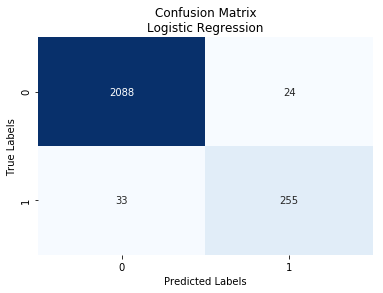

In [31]:
#Printing confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

logreg_confusion_matrix = confusion_matrix(y_test, predicted, labels=[0,1])
print("\n\nConfusion Matrix for Classification Model:\n\n",logreg_confusion_matrix)

plt.figure()
sns.heatmap(logreg_confusion_matrix, annot=True, cbar=False, cmap="Blues", fmt="d") 
#string formatting 'd' gives decimal integer
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix\nLogistic Regression")

plt.show()

C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


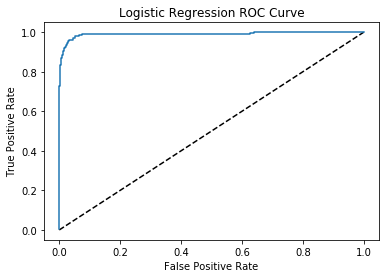

In [32]:
#Printing ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show()

In [39]:
from sklearn.feature_selection import RFE
names = list(UsersEngagementJoined)
rfe = RFE(model, n_features_to_select = 1)
fit = rfe.fit(X, y)

print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'daysbtwn'), (2, 'creation_source'), (3, 'opted_in_to_mailing_list'), (4, 'enabled_for_marketing_drip'), (5, 'adopted'), (6, 'org_id')]
